In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\smart\Downloads\BankNote_Authentication.csv")

In [3]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df.shape

(1372, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
# using dictionary comprehension to check unique values in each column
unique_values = {col: df[col].unique() for col in df.columns}
for col, values in unique_values.items():
    print(f"Unique values in {col}: {values}")

Unique values in variance: [ 3.6216  4.5459  3.866  ... -3.7503 -3.5637 -2.5419]
Unique values in skewness: [  8.6661    8.1674   -2.6383  ... -13.4586   -8.3827   -0.65804]
Unique values in curtosis: [-2.8073 -2.4586  1.9242 ... 17.5932 12.393   2.6842]
Unique values in entropy: [-0.44699 -1.4621   0.10645 ... -1.2953  -0.55949 -2.7771 ]
Unique values in class: [0 1]


In [7]:
unique_values = {col: df[col].nunique() for col in df.columns}
for col, values in unique_values.items():
    print(f"No. of Unique values in {col}: {values}")

No. of Unique values in variance: 1338
No. of Unique values in skewness: 1256
No. of Unique values in curtosis: 1270
No. of Unique values in entropy: 1156
No. of Unique values in class: 2


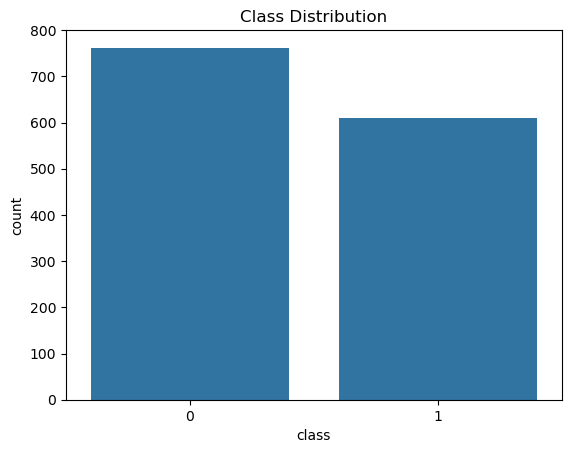

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['class'])
plt.title("Class Distribution")
plt.show()

In [9]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [11]:
y.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: class, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
X_test

,variance,skewness,curtosis,entropy
430,1.569100,6.34650,-0.18280,-2.409900
588,-0.278020,8.18810,-3.13380,-2.527600
296,0.051979,7.05210,-2.05410,-3.150800
184,-1.755900,11.94590,3.09460,-4.897800
244,2.428700,9.38210,-3.24770,-1.454300
...,...,...,...,...
843,-0.526450,-0.24832,-0.45613,0.419380
494,2.569800,-4.40760,5.98560,0.078002
1032,0.163580,-3.35840,1.37490,1.356900
710,2.401200,1.62230,3.03120,0.716790


In [15]:
y_test

430     0
588     0
296     0
184     0
244     0
       ..
843     1
494     0
1032    1
710     0
333     0
Name: class, Length: 412, dtype: int64

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {
    'n_estimators': [10,20,50],   
    'max_depth': [10, 20, None],      
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'criterion': ['gini', 'entropy','log_loss'], 
    'max_features': ['sqrt', 'log2',None],
}

In [19]:
classifier_grid=GridSearchCV(classifier,param_grid=param_grid,scoring="accuracy",cv=5)

In [20]:
classifier_grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50]},
             scoring='accuracy')

In [25]:
classifier_grid.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 20}

In [26]:
classifier_grid.best_score_

0.9927083333333334

In [27]:
y_pred=classifier_grid.predict(X_test)

In [28]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1
 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1
 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0
 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0]


In [30]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_test,y_pred)
score

0.9951456310679612

In [31]:
print(str(classification_report(y_pred,y_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      0.99      0.99       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [32]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()